# Univariate Regression

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

df = pd.read_csv('data.csv')
df.head()

,x,y
0,0.033554,-0.769511
1,1.408211,1.660056
2,1.263543,3.523426
3,-0.184194,-0.812238
4,-0.100872,1.904836


In [5]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size = 0.2, random_state = 123)


In [7]:
X_train = df_train[['x']]  # double brackt indicates that i need to put values of x column in list[]
Y_train = df_train[['y']]

X_test = df_test[['x']]
Y_test = df_test[['y']]

After we have splitted our data , we will create our model now

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # this will evaluate performance of our model

# creating the model

Lin_model = LinearRegression()
Lin_model.fit(X_train,Y_train)

LinearRegression()

In [10]:
# coefficients and intercept of our model

a = Lin_model.coef_[0]
b = Lin_model.intercept_

print('the equation for the best linear fit is:\n Y= ',a, '+' ,b, 'X')

the equation for the best linear fit is:
 Y=  [1.22813302] + [-0.08381608] X


<function matplotlib.pyplot.show(close=None, block=None)>

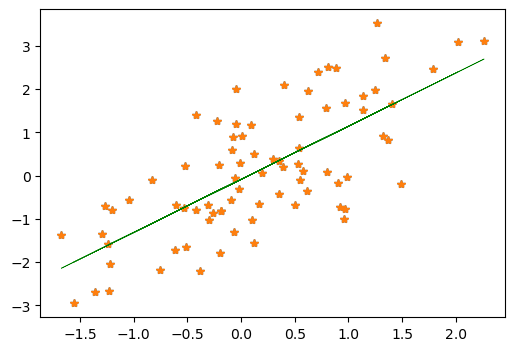

In [17]:
Y_train_pred = Lin_model.predict(X_train)

plt.figure(figsize =(6,4))
plt.plot(X_train, Y_train, '*')
plt.plot(X_train, Y_train, '*')
plt.plot(X_train, Y_train_pred, '-g',linewidth = '0.5')
plt.show